In [3]:
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
import read_model_ID;
reload(read_model_ID);

## Load fit data and identify best fit

In [5]:
simset = []
no_good = []
final_par = []

chi_squared = []

file = '28_2_2019/run4/fit_28_2_2019_sim_'
parameters = np.loadtxt('example-params-2.txt')

#---------- collect simulations ---------------
for sim in [1,3,4,7,9,10,11,12,13,17,19,20,24,25,27,29,30,35,37,39,40,43,44,45,50]:
#for sim in [2,3,4,7,8,10,11,12,13,14,15,16,17,19,20]:
    sa = pd.read_csv(file +str(sim)+'.txt', delimiter='\t', index_col=False)
    filename = file +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    final_par_temp = sa.loc[len(sa)-1,'Parameter 1':'Parameter 43']
    final_par.append(final_par_temp.values)
    
best_fit = simset[np.argmin(chi_squared)]
best_fit

'28_2_2019/run4/fit_28_2_2019_sim_37.txt'

In [6]:
chi_squared = np.array(chi_squared)
indices_low_chi = np.where(chi_squared<5000)
final_par_low_chi = np.array(final_par)[indices_low_chi[0]]

## Finding Median

In [7]:
median = np.zeros(len(final_par_low_chi[0]))
for i in range(len(final_par_low_chi[0])):
    median_temp = list()
    for j in range(len(final_par_low_chi)):
        median_temp.append(final_par_low_chi[j][i])
    median[i] = np.median(np.array(median_temp))
        

## Matches

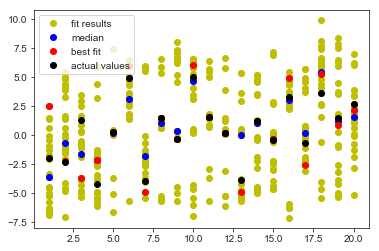

In [16]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,21),final_par_low_chi[i][0:20],'yo',label='fit results')
    
plot2, = plt.plot(range(1,21),median[0:20],'bo',label='median')
plot3, = plt.plot(range(1,21),final_par[np.argmin(chi_squared)][0:20],'ro',label='best fit')
plot4, = plt.plot(range(1,21),parameters[0:20],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3,plot4])


## Mismatches

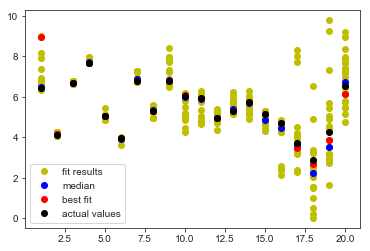

In [17]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,21),final_par_low_chi[i][20:40],'yo',label='fit results')

plot2, = plt.plot(range(1,21),median[20:40],'bo',label='median')
plot3, = plt.plot(range(1,21),final_par[np.argmin(chi_squared)][20:40],'ro',label='best fit')
plot4, = plt.plot(range(1,21),parameters[20:40],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3,plot4])


## Energy Landscape

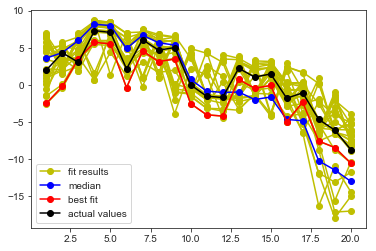

In [18]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,21),-np.cumsum(final_par_low_chi[i][0:20]),'y-o',label='fit results')
    
plot2, = plt.plot(range(1,21),-np.cumsum(median[0:20]),'b-o', label='median')    
plot3, = plt.plot(range(1,21),-np.cumsum(final_par[np.argmin(chi_squared)][0:20]),'r-o',label='best fit')
plot4, = plt.plot(range(1,21),-np.cumsum(parameters[0:20]),'k-o',label='actual values')
plt.legend(handles=[plot1,plot2,plot3,plot4])

## Forward rates

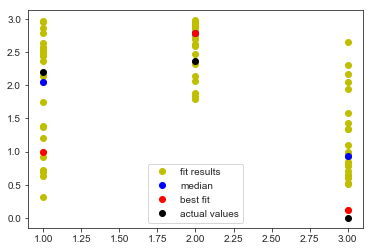

In [20]:
plt.figure()
for i in range(len(final_par_low_chi)):
    plot1, = plt.plot(range(1,4),final_par_low_chi[i][40:43],'yo',label='fit results')

plot2, = plt.plot(range(1,4),median[40:43],'bo',label='median')
plot3, = plt.plot(range(1,4),final_par[np.argmin(chi_squared)][40:43],'ro',label='best fit')
plot4, = plt.plot(range(1,4),parameters[40:43],'ko',label='actual values')
plt.legend(handles=[plot1,plot2,plot3,plot4])